# ML classified sample data 

## Analyse perfect Water/NonWater pixels characteristics

In [7]:
import os, sys
import pickle
import numpy as np

from numpy import genfromtxt

import pandas as pd
#import pandas.io.data
from pandas_datareader import data, wb
from pandas import DataFrame



%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # increase plot size a bit...
rcParams['axes.formatter.useoffset'] = False  # disable scalar formatter / offset in axes labels

In [8]:
# To run a python script, use run path2/script.py

# run ../python/apply_detree.py /g/data/u46/fxz547/wofs_training_sample_data/orig_copy/Test_Tile_samples_20140203.csv


In [9]:
# import your own modules by providing path
sys.path.append('../python')

In [10]:
import apply_detree

#import imp; imp.reload(apply_detree)  # force the interpreter to re-import if apply_detree.py changed

In [11]:
!ls /g/data/u46/fxz547/wofs_training_sample_data/
#my_file_csv='/g/data/u46/fxz547/wofs_training_sample_data/orig_copy/Test_Tile_samples_20140203.csv'
my_file_csv='/g/data/u46/fxz547/wofs_training_sample_data/all_samples.csv'

all_samples.csv  orig_copy


In [12]:
pdf = apply_detree.get_pdf_from_csv(my_file_csv)
# todo: keep the old class_label. how to add a new_class column?

In [13]:
pdf.shape

(4937172, 17)

In [14]:
pdf.ix[pdf.Class_name.str.match('^W_*')==False, 'Class2'] = 'NoWater'

#     # Assign W_* into Water; all other classes into NotWater. Binary classes
pdf.ix[pdf.Class_name.str.match('^W_*'), 'Class2'] = 'Water'
    

In [15]:
# Group by Pixel Class_name, then count the number of rows in each group
pdf.groupby('Class2').count()

,Bright,Class_name,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl
Class2,,,,,,,,,,,,,,,,,
NoWater,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595
Water,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577


In [16]:
pdf.groupby('Mean_PQMas').count()  # perfect good pixels

,Bright,Class_name,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl,Class2
Mean_PQMas,,,,,,,,,,,,,,,,,
16383.0,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172


In [17]:
#perfect pixel has a quality flag 13683 in the column Mean_PQMa
bin(16383)

'0b11111111111111'

# Separate the Water and NonWater data

In [18]:
dfwater=pdf[pdf['Class2'] =='Water']
dfnowater= pdf[pdf['Class2'] !='Water']

In [19]:
dfwater.shape

(947577, 18)

In [20]:
dfnowater.shape

(3989595, 18)

# Plotting the values

See http://pandas.pydata.org/pandas-docs/stable/visualization.html


# How to design best ML models accordingly?

In [21]:
# https://www.google.com.au/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=how+to+design+Machine+learning+models+according+feature+stats

## Prepare sample dataset for scikit analysis

In [22]:
clm_list = []
for column in pdf.columns: clm_list.append(column)
    
print (clm_list[7],clm_list[10],clm_list[12])

('Mean_tm5c', 'NDI_52', 'NDI_72')


In [23]:
print (clm_list[10],clm_list[12], clm_list[7])

('NDI_52', 'NDI_72', 'Mean_tm5c')


In [24]:
#select the columns values into numpy array
#X = pdf[clm_list[3:14]].values
# select 3 most important features
X= pdf[[clm_list[10],clm_list[12], clm_list[7]]].values
# Y = pdf[clm_list[1]].values
Y = pdf[clm_list[-1]].values  # the new column Class2
       
print X.shape, type(X)
print Y.shape

(4937172, 3) <type 'numpy.ndarray'>
(4937172,)


## Hello Scikit-learn

In [25]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)

In [26]:
# Traing the model with the sample data %time clf = clf.fit(X, Y)

clf = clf.fit(X, Y)

In [27]:
# verify the model using function predict
isample= 227014
# Or get a random sample to compare
#isample=np.random.random_integers(0,999)

print (isample, clf.predict(X[isample,:].reshape(1, -1) ), Y[isample], pdf.Class_name.iloc[isample])

(227014, array(['NoWater'], dtype=object), 'Water', 'W_Dark')


In [28]:
#3) Apply / evaluate
clf.score(X,Y)

0.97805403579214989

In [29]:
# Advanced_sklearn/Chapter%201/Classification.ipynb
# more methods, split the samples , validation 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [30]:
print X_test.shape
clf.score(X_test,y_test)


(1234293, 3)


0.97814538363257342

In [31]:
# Let's Generate the Tree.

from IPython.display import Image 
from sklearn.externals.six import StringIO  
import pydot 
with open("de_tree.dot", 'w') as f: f = tree.export_graphviz(clf, out_file=f)

    
# dot -Tpdf iris.dot -o iris.pdf

!dot -Tpdf de_tree.dot -o de_tree.pdf

in label of node 0
in label of node 1
in label of node 2
in label of node 3
in label of node 4
in label of node 5
in label of node 6
in label of node 7
in label of node 8
in label of node 9
in label of node 10
in label of node 11
in label of node 12
in label of node 13
in label of node 14
in label of node 15
in label of node 16
in label of node 17
in label of node 18
in label of node 19
in label of node 20
in label of node 21
in label of node 22
in label of node 23
in label of node 24
in label of node 25
in label of node 26
in label of node 27
in label of node 28
in label of node 29
in label of node 30
in label of node 31
in label of node 32
in label of node 33
in label of node 34
in label of node 35
in label of node 36
in label of node 37
in label of node 38
in label of node 39
in label of node 40
in label of node 41
in label of node 42
in label of node 43
in label of node 44
in label of node 45
in label of node 46
in label of node 47
in label of node 48
in label of node 49
in label o

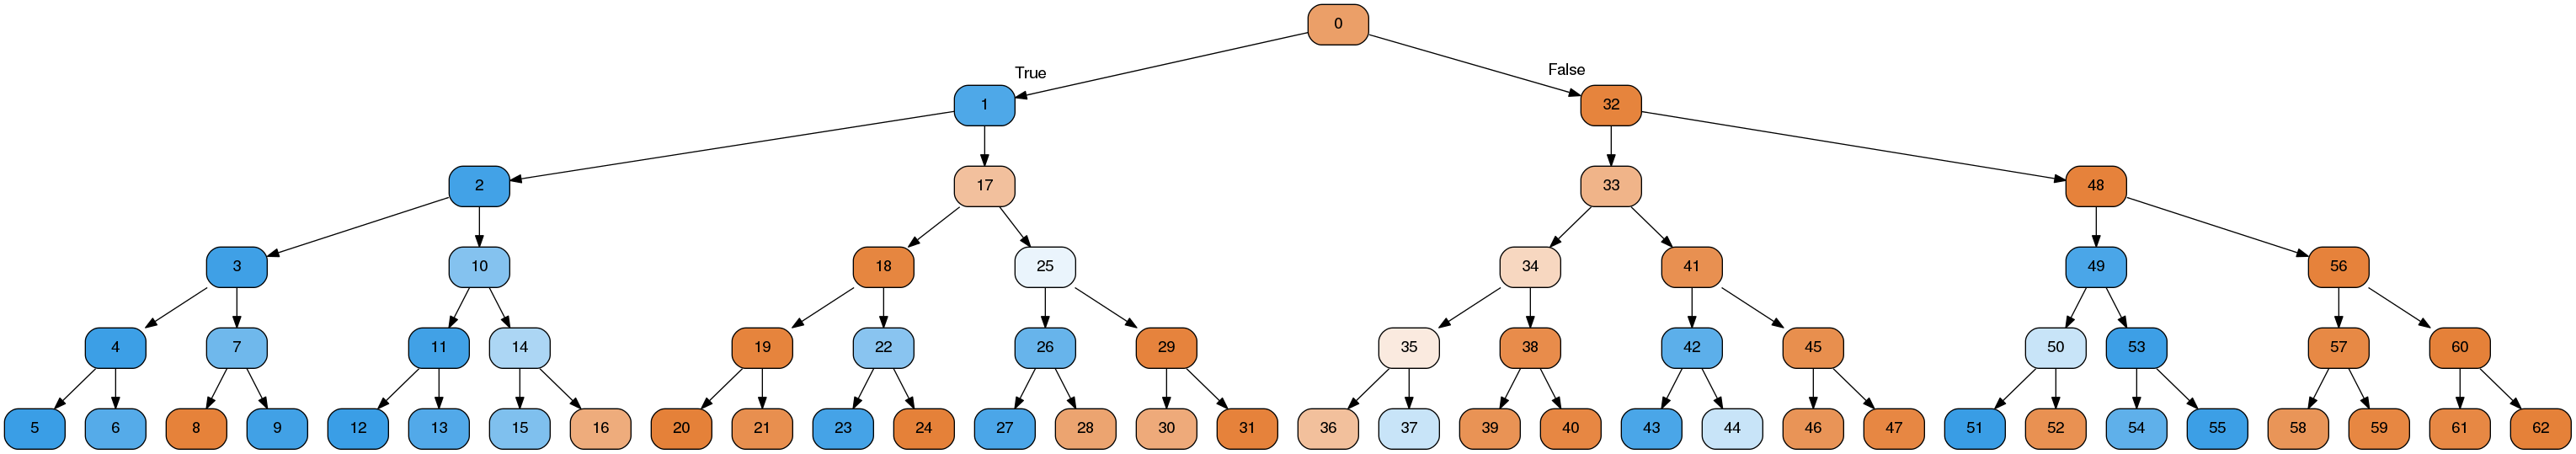

In [32]:
# Todo: show Tree in this notebook
# http://scikit-learn.org/stable/modules/tree.html
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=[clm_list[10],clm_list[12], clm_list[7]],  
                         class_names=Y[:],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [33]:
# http://scikit-learn.org/stable/modules/model_persistence.html
import pickle
s = pickle.dumps(clf)

#print(s)
#to unpickle clf2 = pickle.loads(s)
#clf2.predict(X[0:1])
#array([0])


In [34]:
# unpickle
clf1 = pickle.loads(s)

In [35]:
from sklearn.externals import joblib
joblib.dump(clf, 'detreedep5.pkl') 

#Later you can load back the pickled model (possibly in another Python process) with:
#clf = joblib.load('detreedep5.pkl')

# Note joblib.dump returns a list of filenames. Each individual numpy array contained in the clf object is serialized as a separate file on the filesystem. All files are required in the same folder when reloading the model with joblib.load.

['detreedep5.pkl',
 'detreedep5.pkl_01.npy',
 'detreedep5.pkl_02.npy',
 'detreedep5.pkl_03.npy',
 'detreedep5.pkl_04.npy']

In [36]:
clf2 = joblib.load('detreedep5.pkl')

In [37]:
isample= 30003

print (isample, clf.predict(X[isample,:].reshape(1, -1) ), Y[isample], pdf.Class_name.iloc[isample])

print (isample, clf1.predict(X[isample,:].reshape(1, -1) ), Y[isample], pdf.Class_name.iloc[isample])
print (isample, clf2.predict(X[isample,:].reshape(1, -1) ), Y[isample], pdf.Class_name.iloc[isample])
print (isample, clf3.predict(X[isample,:].reshape(1, -1) ), Y[isample], pdf.Class_name.iloc[isample])

(30003, array(['Water'], dtype=object), 'Water', 'W_Salt_Lake')
(30003, array(['Water'], dtype=object), 'Water', 'W_Salt_Lake')
(30003, array(['Water'], dtype=object), 'Water', 'W_Salt_Lake')
(30003, array(['Water'], dtype=object), 'Water', 'W_Salt_Lake')


In [38]:
with open('detree_clf.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(clf, f, pickle.HIGHEST_PROTOCOL)

In [39]:

with open('detree_clf.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    clf3 = pickle.load(f)

In [40]:
print (clf,clf1,clf2,clf3)

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_w

In [41]:
if clf2 ==clf1:  # This object comparison does not work correctly
    print ("unpickled OK")
else:
    print("This may not worked?")

This may not worked?


# Google search how to select important feature

** http://machinelearningmastery.com/an-introduction-to-feature-selection/

** http://scikit-learn.org/stable/modules/feature_selection.html
    

# you can pickle the clf tree for later use.

In [42]:
# http://scikit-learn.org/stable/modules/model_persistence.html

# http://stackoverflow.com/questions/15564410/scikit-learn-svm-how-to-save-load-support-vectors
# 
# show tree

clf.tree_.__getstate__()['nodes']

array([(1, 32, 0, 0.10469971597194672, 0.3101821505731033, 4937172, 4937172.0),
       (2, 17, 2, 726.5, 0.17732165752527973, 952064, 952064.0),
       (3, 10, 1, -0.21966543793678284, 0.08536597765687415, 869666, 869666.0),
       (4, 7, 2, 468.5, 0.05854168024141604, 818242, 818242.0),
       (5, 6, 0, -0.1656680852174759, 0.03195855967077221, 761307, 761307.0),
       (-1, -1, -2, -2.0, 0.016214179125706996, 708352, 708352.0),
       (-1, -1, -2, -2.0, 0.21752002065520948, 52955, 52955.0),
       (8, 9, 0, -0.717576265335083, 0.3393266472147667, 56935, 56935.0),
       (-1, -1, -2, -2.0, 0.012192339893513204, 10434, 10434.0),
       (-1, -1, -2, -2.0, 0.08074607956242552, 46501, 46501.0),
       (11, 14, 2, 83.5, 0.3990717725693712, 51424, 51424.0),
       (12, 13, 1, -0.011807732284069061, 0.08136991332435273, 14568, 14568.0),
       (-1, -1, -2, -2.0, 0.016706230818886558, 9734, 9734.0),
       (-1, -1, -2, -2.0, 0.19749510817477023, 4834, 4834.0),
       (15, 16, 1, -0.0062696542

# Let's Try some other methods

In [43]:
# from sklearn.svm import LinearSVC
# svm = LinearSVC(C=0.1)
# svm.fit(X_train, y_train)


# print(svm.predict(X_train))
# print(y_train)

# svm.score(X_train, y_train)

# svm.score(X_test, y_test)

# Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=50)
# rf.fit(X_train, y_train)
# from sklearn.svm import LinearSVC
# # svm = LinearSVC(C=0.1)
# # svm.fit(X_train, y_train)


# # print(svm.predict(X_train))
# # print(y_train)

# # svm.score(X_train, y_train)

# # svm.score(X_test, y_test)
# rf.predict(X_test)

# rf.score(X_test, y_test)

# Stop here. Do acuracy comparison:
    
# Random Forest 99.310%  Train slow
# LinearSVM 90.799%
# DecisionTree(depth=7) 96.756%  Train very fast. Complex tree

# Cross Validation
Advanced_sklearn/Chapter%201/Cross%20Validation.ipynb

In [ ]:
# compute resource limit problem 
from sklearn.cross_validation import cross_val_score

#for classifier in [clf, svm, rf]:
for classifier in [clf] :
    scores = cross_val_score(classifier, X, Y, cv=2)
    print(scores)
    print(np.mean(scores))

# Results with my_file_csv='/g/data/u46/fxz547/wofs_training_sample_data/orig_copy/Test_Tile_samples_20140203.csv'
# random forest is no better than clf. svm is no good.
# [ 0.93761947  0.9168854   0.93080083  0.96054265  0.97094193]
# cls:  0.943358053934
# [ 0.84295027  0.93209894  0.90567316  0.90808262  0.90809689]
# svm:  0.899380377677
# [ 0.92633591  0.91465293  0.94864626  0.94893796  0.97848818]
# rf: 0.943412249083

In [ ]:
!ls -ltr

In [ ]:
print clf3

# PCA analysis

In [ ]:
#sample function

def sample_PCA():
    """
    Code source: Gaël Varoquaux. License: BSD 3 clause
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D


    from sklearn import decomposition
    from sklearn import datasets

    np.random.seed(5)

    centers = [[1, 1], [-1, -1], [1, -1]]
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    fig = plt.figure(1, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    pca = decomposition.PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)

    for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean() + 1.5,
                  X[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(np.float)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)

    x_surf = [X[:, 0].min(), X[:, 0].max(),
              X[:, 0].min(), X[:, 0].max()]
    y_surf = [X[:, 0].max(), X[:, 0].max(),
              X[:, 0].min(), X[:, 0].min()]
    x_surf = np.array(x_surf)
    y_surf = np.array(y_surf)
    v0 = pca.transform(pca.components_[[0]])
    v0 /= v0[-1]
    v1 = pca.transform(pca.components_[[1]])
    v1 /= v1[-1]

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    plt.show()


In [ ]:
sample_PCA()

In [ ]:
print (X.shape)

In [ ]:
# See wofs/Zlocaltest/water_pixels_classification_1.ipynb

#http://stackoverflow.com/questions/27699545/scikit-learn-pca

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fig = plt.figure(1, figsize=(4, 3))
plt.clf()


pca = PCA(n_components=3)
pca.fit(X)
pca_score = pca.explained_variance_ratio_   #Eigenvalues (normalized)
V = pca.components_   #Eigenvectors

print (pca_score)

print (V)

print(pca.get_covariance()) #Covariance Matrix
# x_pca_axis, y_pca_axis, z_pca_axis = V.T * pca_score / pca_score.min()

# x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
# x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
# y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
# z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
# x_pca_plane.shape = (2, 2)
# y_pca_plane.shape = (2, 2)
# z_pca_plane.shape = (2, 2)
    
# ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

plt.plot(pca_score, )

plt.show()


In [ ]:
def classify_pixel(images, float64=False):
    """ 
    Implement the decision tree of Norman Mueller et al, to clssify a pixel with 6-bands input.
    Produce a water classification image from the supplied images (6 bands of an NBAR, multiband Landsat image)
    This method evaluates N.Mueller's 7-depth decision tree as follows:


                    -----------------------------N1---------------------------------
                    |                                                              |
                    |                                                              |
                 ---N2-----                                           -------------N21---------------------
                 |        |                                           |                                   |
                 |        |                                           |                                   |
       ----------N4----   N3                                    ------N22---                           ---N35-------
       |              |                                         |          |                           |           |
       |              |                                         |          |                           |           |
    ---N5---       ---N8--------------                       ---N24----    N23                      ---N37------   N36
    |      |       |                 |                       |        |                             |          |
    |      |       |                 |                       |        |                             |          |
    N6     N7   ---N12------------   N9             ---------N26---   N25                        ---N39-----   N38
                |                |                  |             |                              |         |
                |                |                  |             |                              |         |
             ---N16---        ---N13---             N27   --------N28---                   ------N41---    N40
             |       |        |       |                   |            |                   |          |
             |       |        |       |                   |            |                   |          |
             N17  ---N18---   N14     N15              ---N29---    ---N30---           ---N43---     N42
                  |       |                            |       |    |       |           |       |
                  |       |                            |       |    |       |           |       |
                  N19     N20                          N31     N32  N33     N34         N44     N45


:param images:
    A 3D numpy array ordered in (bands,rows,columns), containing the spectral data.
    It is assumed that the spectral bands follow Landsat 5 & 7, Band 1, Band 2, Band 3, Band 4, Band 5, Band 7.

:param float64:
    Boolean keyword. If set to True then the data will be converted to type float64 if not already float64.
    Default is False.

:return:
    A 2D numpy array of type UInt8.  Values will be 0 for No Water, 1 for Unclassified and 128 for water.

:notes:
    The input array will be converted to type float32 if not already float32.
    If images is of type float64, then images datatype will be left as is.

:transcription:
    Transcribed from a Tree diagram output by CART www.salford-systems.com
    Josh Sixsmith; joshua.sixsmith@ga.gov.au

    """

#     logger = logging.getLogger("WaterClasserfier")
#     logger.debug("Started")

    def band_ratio(a,b):
        """
        Calculates a normalised ratio index.
        """
        c = (a - b) / (a + b)
        return c

    dims = images.shape
    if len(dims) == 3:
        bands = dims[0]
        rows  = dims[1]
        cols  = dims[2]
    else:
        rows = dims[0]
        cols = dims[1]

    dtype = images.dtype

    # Check whether to enforce float64 calcs, unless the datatype is already float64
    # Otherwise force float32
    if float64:
        if (dtype != 'float64'):
            images = images.astype('float64')
    else:
        if (dtype == 'float64'):
            # Do nothing, leave as float64
            images = images
        elif (dtype != 'float32'):
            images = images.astype('float32')

    classified = numpy.ones((rows,cols), dtype='uint8')

    NDI_52 = band_ratio(images[4], images[1])
    NDI_43 = band_ratio(images[3], images[2])
    NDI_72 = band_ratio(images[5], images[1])

    b1 = images[0]
    b2 = images[1]
    b3 = images[2]
    b4 = images[3]
    b5 = images[4]
    b7 = images[5]

    # Lets start going down the trees left branch, finishing nodes as needed
    # Lots of result arrays eg r1, r2 etc of type bool are created
    # These could be recycled to save memory, but at the moment they serve to show the tree structure
    # Temporary arrays of type bool (_tmp, _tmp2) are used to combine the boolean decisions
    r1 = NDI_52 <= -0.01

    r2 = b1 <= 2083.5
    classified[r1 & ~r2] = 0 # Node 3

    r3 = b7 <= 323.5
    _tmp = r1 & r2
    _tmp2 = _tmp & r3
    _tmp &= ~r3

    r4 = NDI_43 <= 0.61
    classified[_tmp2 & r4]  = 128 # Node 6
    classified[_tmp2 & ~r4] = 0 # Node 7

    r5 = b1 <= 1400.5
    _tmp2 = _tmp & ~r5
    r6 = NDI_43 <= -0.01
    classified[_tmp2 & r6]  = 128 # Node 10
    classified[_tmp2 & ~r6] = 0 # Node 11

    _tmp &= r5

    r7 = NDI_72 <= -0.23
    _tmp2 = _tmp & ~r7
    r8 = b1 <= 379
    classified[_tmp2 & r8]  = 128 # Node 14
    classified[_tmp2 & ~r8] = 0 # Node 15

    _tmp &= r7

    r9 = NDI_43 <= 0.22
    classified[_tmp & r9] = 128 # Node 17

    _tmp &= ~r9

    r10 = b1 <= 473
    classified[_tmp & r10]  = 128 # Node 19
    classified[_tmp & ~r10] = 0 # Node 20

    # Left branch is completed; cleanup
    #logger.debug("B4 cleanup 1")
    del r2, r3, r4, r5, r6, r7, r8, r9, r10
    gc.collect()
    #logger.debug("cleanup 1 done")

    # Right branch of the tree
    r1 = ~r1

    r11 = NDI_52 <= 0.23
    _tmp = r1 & r11

    r12 = b1 <= 334.5
    _tmp2 = _tmp & ~r12
    classified[_tmp2] = 0 # Node 23

    _tmp &= r12

    r13 = NDI_43 <= 0.54
    _tmp2 = _tmp & ~r13
    classified[_tmp2] = 0 # Node 25

    _tmp &= r13

    r14 = NDI_52 <= 0.12
    _tmp2 = _tmp & r14
    classified[_tmp2] = 128 # Node 27

    _tmp &= ~r14

    r15 = b3 <= 364.5
    _tmp2 = _tmp & r15

    r16 = b1 <= 129.5
    classified[_tmp2 & r16]  = 128 # Node 31
    classified[_tmp2 & ~r16] = 0 # Node 32

    _tmp &= ~r15

    r17 = b1 <= 300.5
    _tmp2 = _tmp & ~r17
    _tmp &= r17
    classified[_tmp]  = 128 # Node 33
    classified[_tmp2] = 0 # Node 34

    _tmp = r1 & ~r11

    r18 = NDI_52 <= 0.34
    classified[_tmp & ~r18] = 0 # Node 36
    _tmp &= r18

    r19 = b1 <= 249.5
    classified[_tmp & ~r19] = 0 # Node 38
    _tmp &= r19

    r20 = NDI_43 <= 0.45
    classified[_tmp & ~r20] = 0 # Node 40
    _tmp &= r20

    r21 = b3 <= 364.5
    classified[_tmp & ~r21] = 0 # Node 42
    _tmp &= r21

    r22 = b1 <= 129.5
    classified[_tmp & r22]  = 128 # Node 44
    classified[_tmp & ~r22] = 0 # Node 45

    #logger.debug("completed")

    return classified


## Select Perfect Pix Data to Analyse 

In [ ]:
perf_pix= pdf[pdf['Mean_PQMas'] == 16383.0]  # where(Mean_PQMas=16383)

# change W_* into Water; all other classes into NotWater. Binary classes
perf_pix.ix[perf_pix.Class_name.str.match('W_*'), 'Class2'] = 'Water'

# change non 'W_*' into NoWater
perf_pix.ix[perf_pix.Class_name.str.match('^W_*')==False, 'Class2'] = 'NoWater'

# Group by Pixel Class_name, then count the number of rows in each group
perf_pix.groupby('Class2').count()

In [ ]:
# Apply a ML algorithm to the pdf type
from sklearn import tree
from IPython.display import Image 
from sklearn.externals.six import StringIO  
import pydot 
    
def apply_ml(pdf):
    #get the column names as list    
    clm_list = []
    for column in pdf.columns: clm_list.append(column)
    print (clm_list[7],clm_list[10],clm_list[12])
    
    #select the columns values into numpy array
    #X = pdf[clm_list[3:14]].values
    # select 3 most important features
    X= pdf[[clm_list[7],clm_list[10],clm_list[12]] ].values
    Y = pdf[clm_list[1]].values

    print X.shape, type(X)
    print Y.shape

    clf = tree.DecisionTreeClassifier(max_depth=5)
    clf= clf.fit(X,Y)
    
    # evaluate the model using function predict
    # isample=123
    # Or get a random sample to compare
    isample=np.random.random_integers(0,999)

    print (isample, clf.predict(X[isample,:].reshape(1, -1) ), Y[isample])

    dot_filename="de_tree.dot"
    with open(dot_filename, 'w') as f: f = tree.export_graphviz(clf, out_file=f)

    
    # !dot -Tpdf de_tree.dot -o de_tree.pdf
    return  dot_filename

In [ ]:
apply_ml(perf_pix)

!dot -Tpdf de_tree.dot -o de_tree.pdf